# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [2]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.shape

(271116, 15)

In [6]:
region = pd.read_csv('noc_regions.csv')
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,LTU,Germany,Australasia
freq,1,4,1


In [8]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [9]:
region.shape

(230, 3)

NOC column is common in both dataframes. So we will join them accordingly.

# Merging Data

In [10]:
df = pd.merge(data, region, on='NOC', how = 'left')

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Data Analysis

## Taking data frame only of gold medals

In [12]:
gold_medals = df[(df.Medal == 'Gold')]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [13]:
gold_medals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

## Calculating the gold medals according to age

In [14]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


### Plotting the age vs gold medals 

Text(0.5, 1.0, 'Gold Medal Distribution')

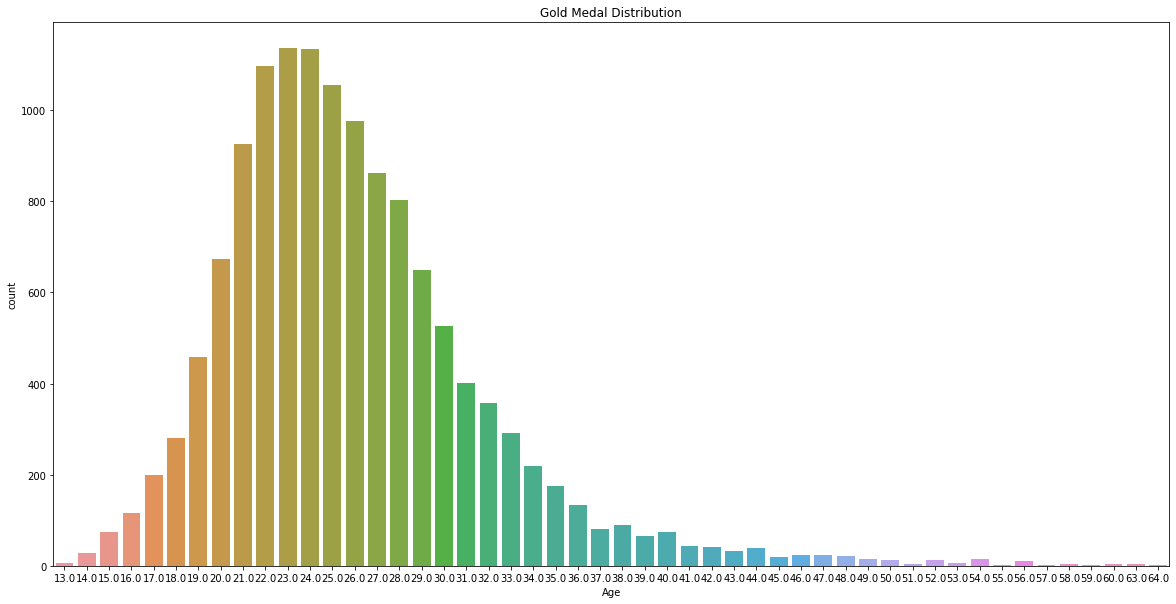

In [15]:
plt.figure(figsize=(20,10))
plt.tight_layout
sns.countplot(gold_medals['Age'])
plt.title('Gold Medal Distribution')

### Claculating total number of people above 40 with gold medal

In [16]:
gold_medals['ID'][gold_medals['Age'] > 40].count()

336

### Determing the events for the gold medal winner above 40 years of age

In [17]:
event_medal = gold_medals['Sport'][gold_medals['Age'] > 40]
event_medal.head()

1755    Equestrianism
3306         Shooting
4784         Shooting
4878          Archery
4879          Archery
Name: Sport, dtype: object

### Plotting number of gold medals in sports for athelets above 40

Text(0.5, 1.0, 'Gold Medals for Athletes Over 40')

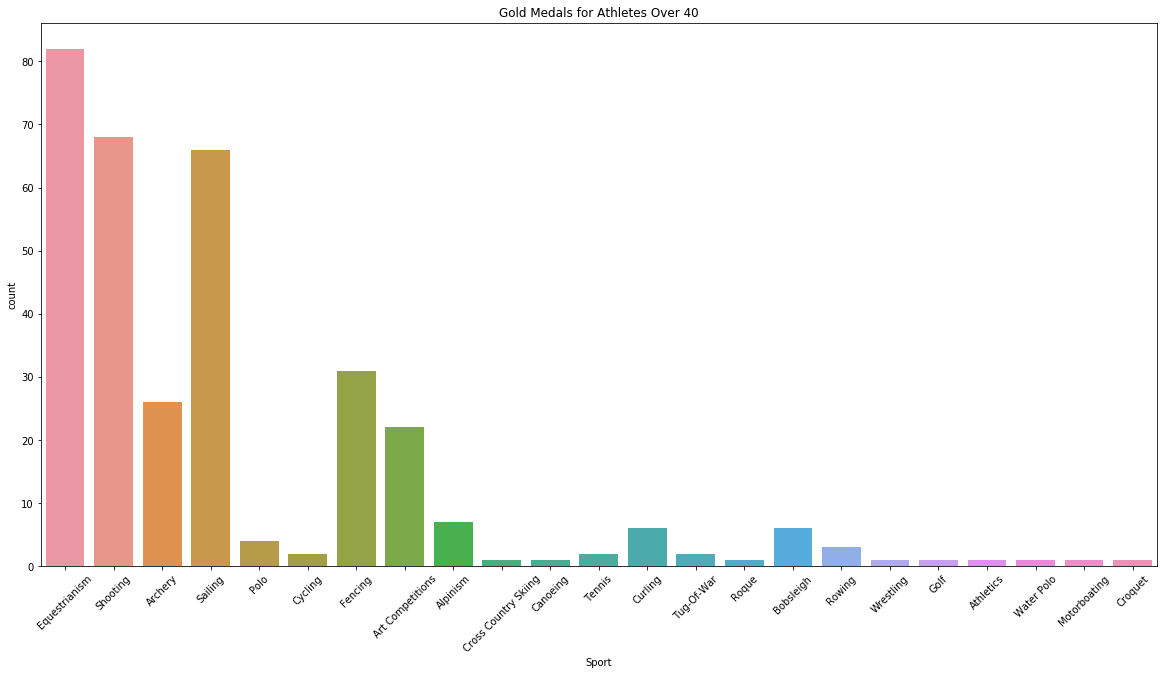

In [18]:
plt.figure(figsize = (20, 10))
plt.tight_layout
medal_count_above_40 = sns.countplot(event_medal)
medal_count_above_40.set_xticklabels(medal_count_above_40.get_xticklabels(), rotation=45)
plt.title('Gold Medals for Athletes Over 40')

### Gold medal distribution according to countries ***************************************

Text(0.5, 1.0, 'Gold Medal Distribution')

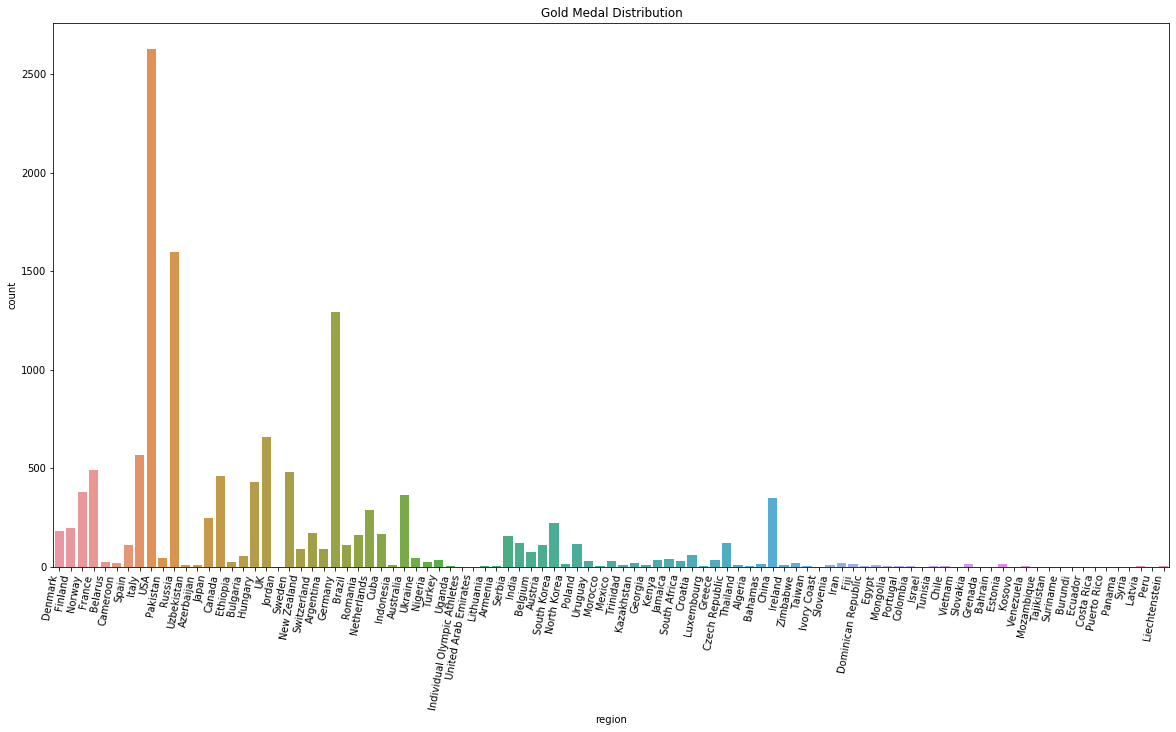

In [19]:
plt.figure(figsize=(20,10))
plt.tight_layout   

area_region = sns.countplot(gold_medals['region'])
area_region.set_xticklabels(area_region.get_xticklabels(), 
                    rotation=80, horizontalalignment='right')

plt.title('Gold Medal Distribution')
    

## Determing number of medals for Finland

In [20]:
medals_fin = df[(df.region == 'Finland')]
medals_fin.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Finland,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,Finland,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN


### Plotting number of medals for finland

In [21]:
x = medals_fin.groupby('Sport')['Medal']
print(x.count())

Sport
Alpine Skiing              1
Archery                    6
Art Competitions           5
Athletics                138
Badminton                  0
Basketball                 0
Biathlon                  12
Boxing                    15
Canoeing                  14
Cross Country Skiing     141
Curling                    4
Cycling                    0
Diving                     0
Equestrianism              0
Fencing                    0
Figure Skating             4
Football                   0
Freestyle Skiing           4
Golf                       0
Gymnastics                99
Hockey                     0
Ice Hockey               174
Judo                       0
Military Ski Patrol        4
Modern Pentathlon         11
Nordic Combined           23
Rhythmic Gymnastics        0
Rowing                    16
Sailing                   35
Shooting                  41
Ski Jumping               34
Snowboarding               3
Speed Skating             24
Swimming                   4
Synchron

### Data frame showing the gold medals won by Finland

In [22]:
fin_olympic_gold = df[(df.region == 'Finland') & (df.Medal == 'Gold')]

In [23]:
fin_olympic_gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
3940,2275,Toimi Johannes Alatalo,M,30.0,174.0,67.0,Finland,FIN,1960 Winter,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,Gold,Finland,NaN
8368,4607,"Kaarlo Johan Jalmari ""Kalle"" Anttila",M,32.0,167.0,64.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Lightweight, Freestyle",Gold,Finland,NaN


### Plot showing gold medals by finland over years

Text(0.5, 1.0, 'Gold Medals by Finland per edition of the Games')

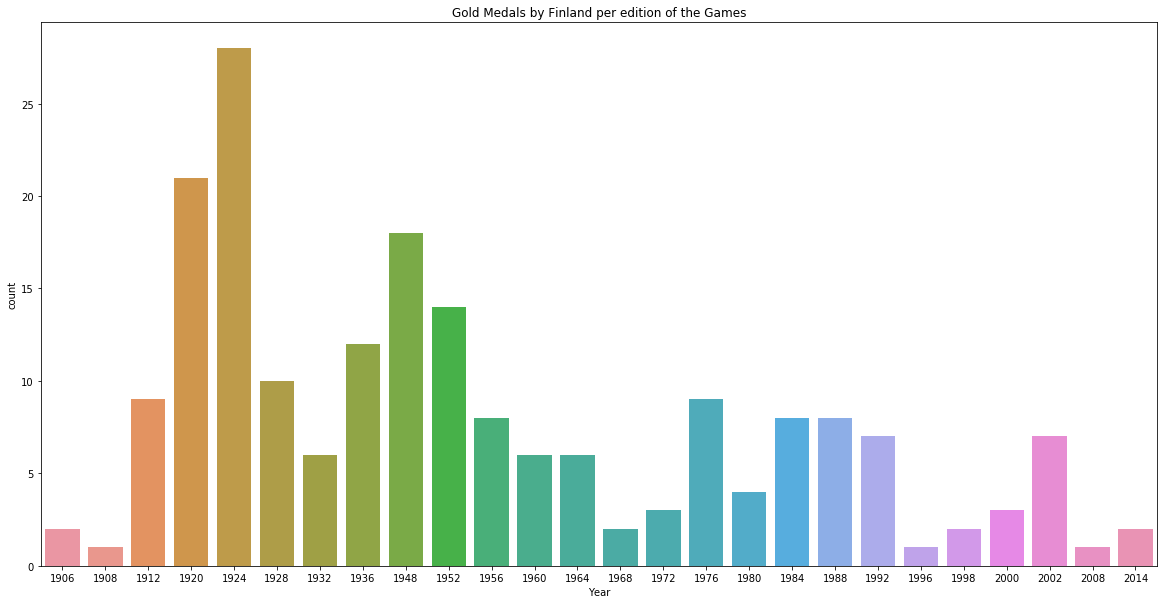

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Year', data = fin_olympic_gold)
plt.title('Gold Medals by Finland per edition of the Games')

### Total number of gold medals 

In [25]:
finland_medals = gold_medals['ID'][gold_medals['region'] == 'Finland'].count()
finland_medals

198

### Filling the NaN value by 0 in Medal column

In [26]:
fin_olympic_medals = df[(df.region == 'Finland')]
fin_olympic_medals.fillna(0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0,Finland,0
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,0.0,0.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,0,Finland,0
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,Finland,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,0,Finland,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,0,Finland,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266449,133284,Paavo Ilmari Yrjl,M,25.0,183.0,82.0,Finland,FIN,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Shot Put,0,Finland,0
266450,133284,Paavo Ilmari Yrjl,M,25.0,183.0,82.0,Finland,FIN,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Decathlon,Gold,Finland,0
266451,133284,Paavo Ilmari Yrjl,M,30.0,183.0,82.0,Finland,FIN,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's Decathlon,0,Finland,0
267096,133624,Rolf Berndt Alexander Zachariassen,M,25.0,190.0,94.0,Bella,FIN,1960 Summer,1960,Summer,Roma,Sailing,Sailing Mixed Two Person Keelboat,0,Finland,0


### Counting the number of different medals over time

In [27]:
fin_olympic_medals.groupby('Medal')['ID'].count()

Medal
Bronze    432
Gold      198
Silver    270
Name: ID, dtype: int64

### Plotting the number of medals throughout the history according to season

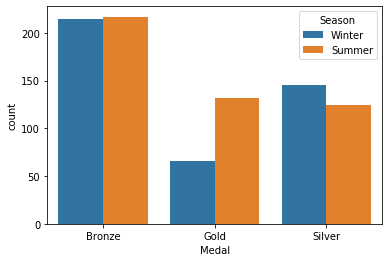

In [28]:
sns.countplot(x="Medal",hue='Season', data=fin_olympic_medals)

### Plotting number of medals won by Male and Female over years

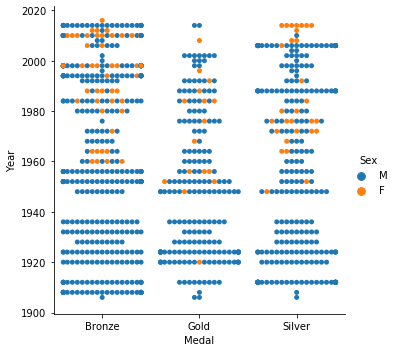

In [29]:
sns.catplot(x="Medal", y='Year',hue = "Sex",kind="swarm", data=fin_olympic_medals)

### Number of medals won according to the season

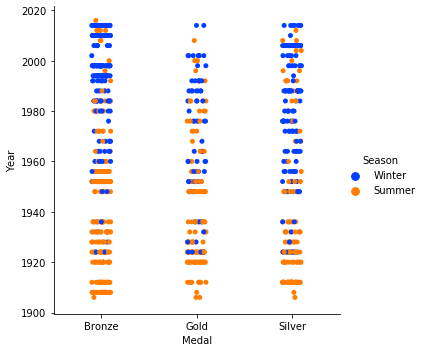

In [30]:

sns.catplot(data=fin_olympic_medals, x='Medal', y='Year', hue = 'Season',
                 palette='bright')

### plot the medals won according to year

Text(0.5, 0, 'Count')

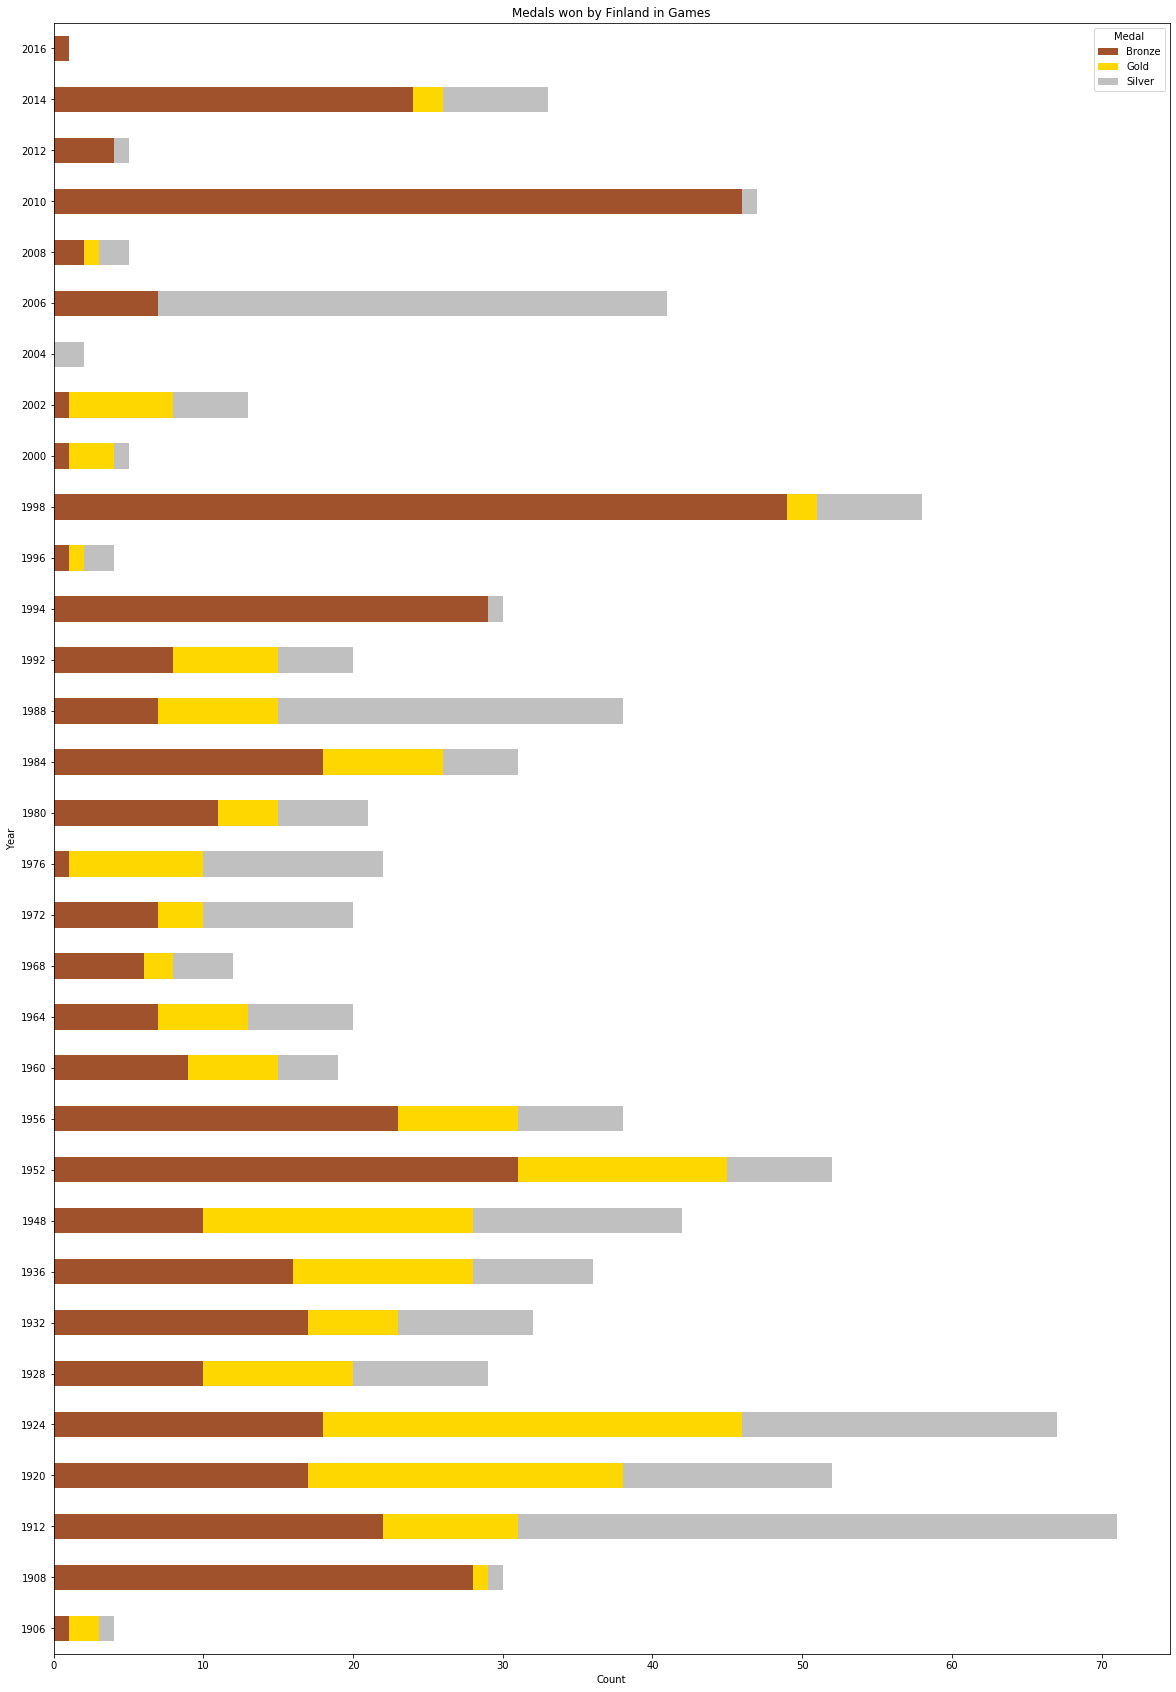

In [31]:
yearly_medal_plot = fin_olympic_medals.groupby(['Medal', 
'Year']).size().reset_index().pivot(columns='Medal', index='Year', values=0)

ax = yearly_medal_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won by Finland in Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")

### Medal count according to the season and sex

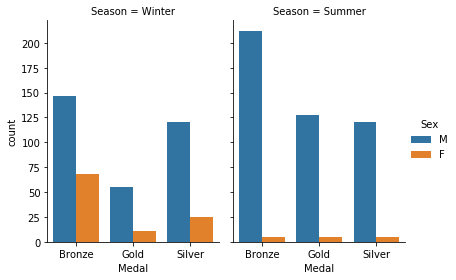

In [32]:
sns.catplot(x="Medal", hue="Sex", col="Season",data=fin_olympic_medals, kind="count",
height=4, aspect=.7)

# Women in olympics

## Determing number of women in summer olympics

In [33]:
women_olympic = df[(df.Sex == 'F') & (df.Season == 'Summer')] 

In [34]:
women_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


## Plotting the growth in the participation of women in olympics

Text(0.5, 1.0, 'Women medals per edition of the Games')

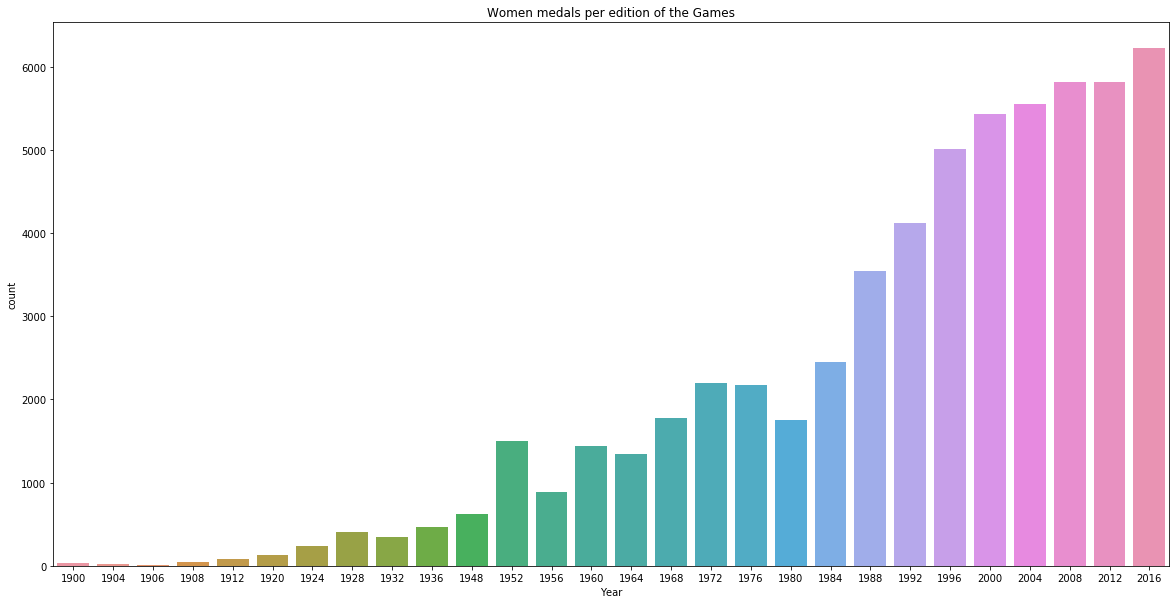

In [35]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women_olympic)
plt.title('Women medals per edition of the Games')

## Medal counts for women of different nations: 1936

In [37]:
women_1936_medal_count = women_olympic[(women_olympic.Year == 1936) & 
                                       (women_olympic.Season == 'Summer')] 

Text(0.5, 0, 'Count')

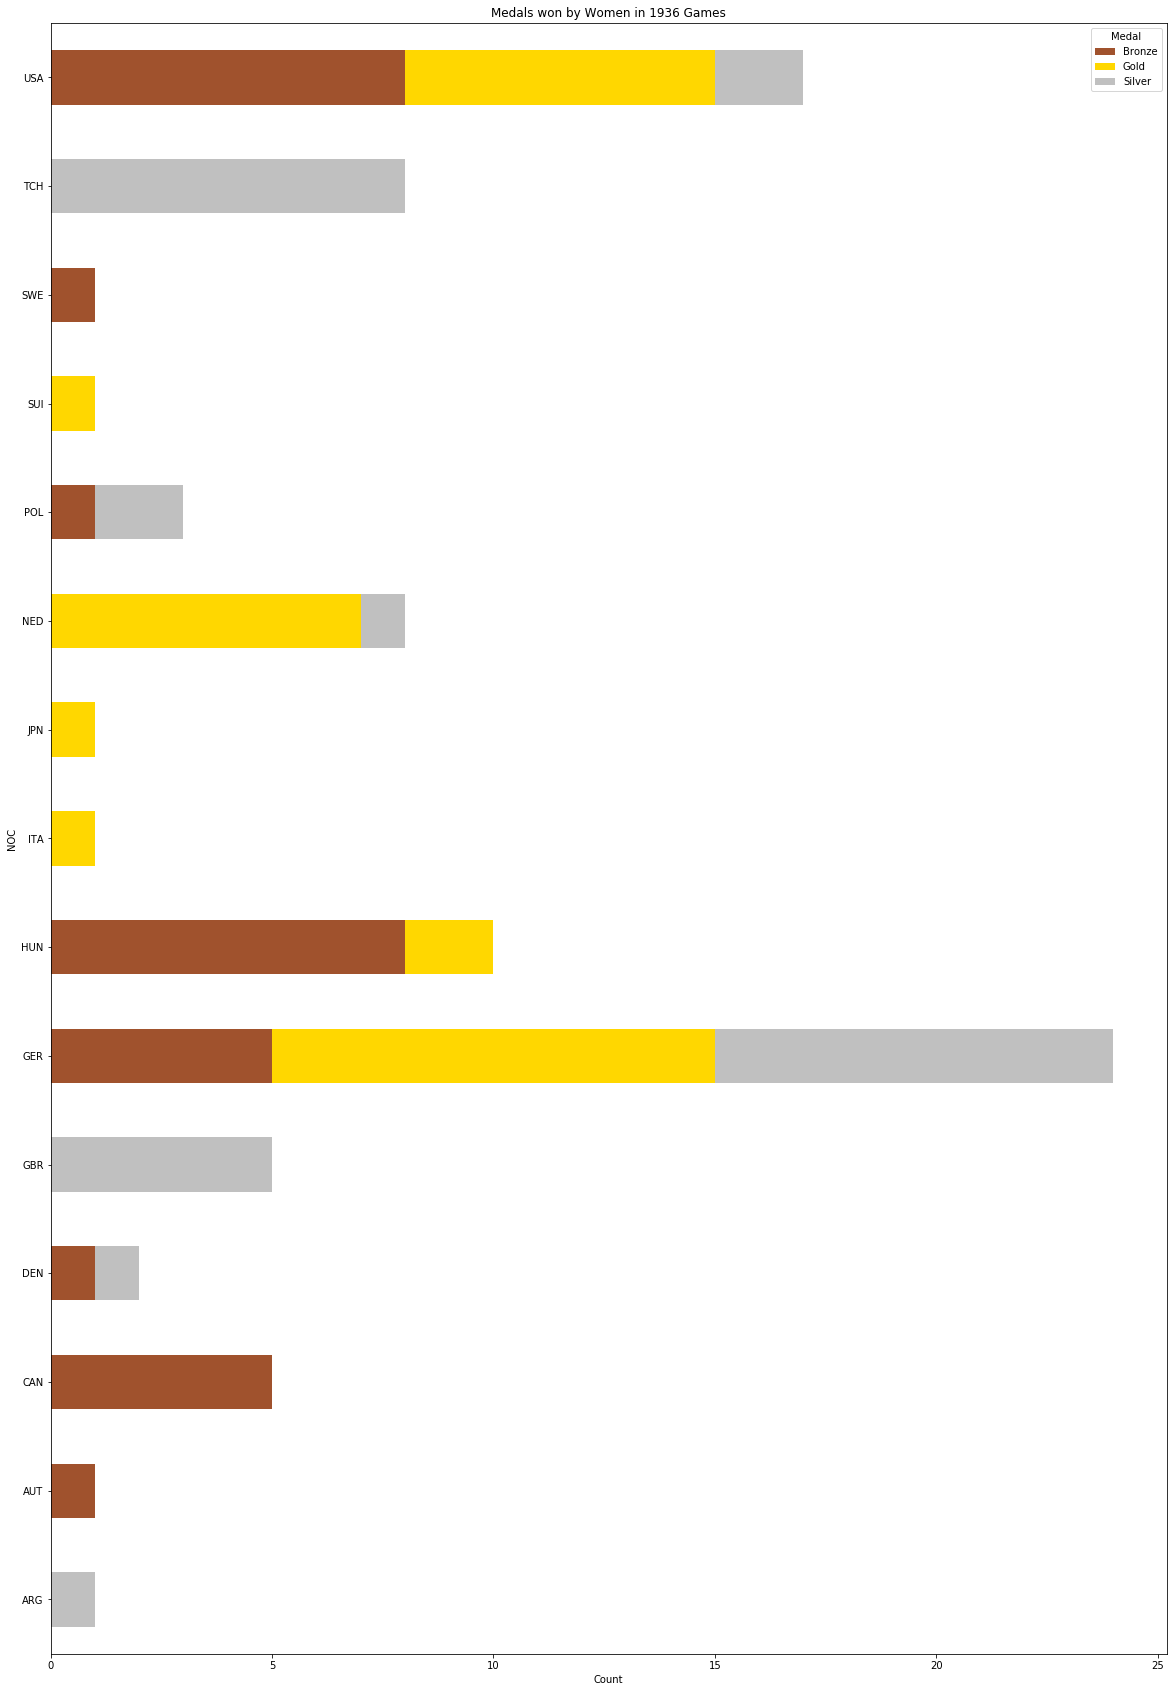

In [38]:
women_1936_medal_plot = women_1936_medal_count.groupby(['Medal', 
'NOC']).size().reset_index().pivot(columns='Medal', index='NOC', values=0)

ax = women_1936_medal_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won by Women in 1936 Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")

## Medal counts for women of different nations: 1976

In [39]:
women_1976_medal_count = women_olympic[(women_olympic.Year == 1976) & 
                                       (women_olympic.Season == 'Summer')]

Text(0.5, 0, 'Count')

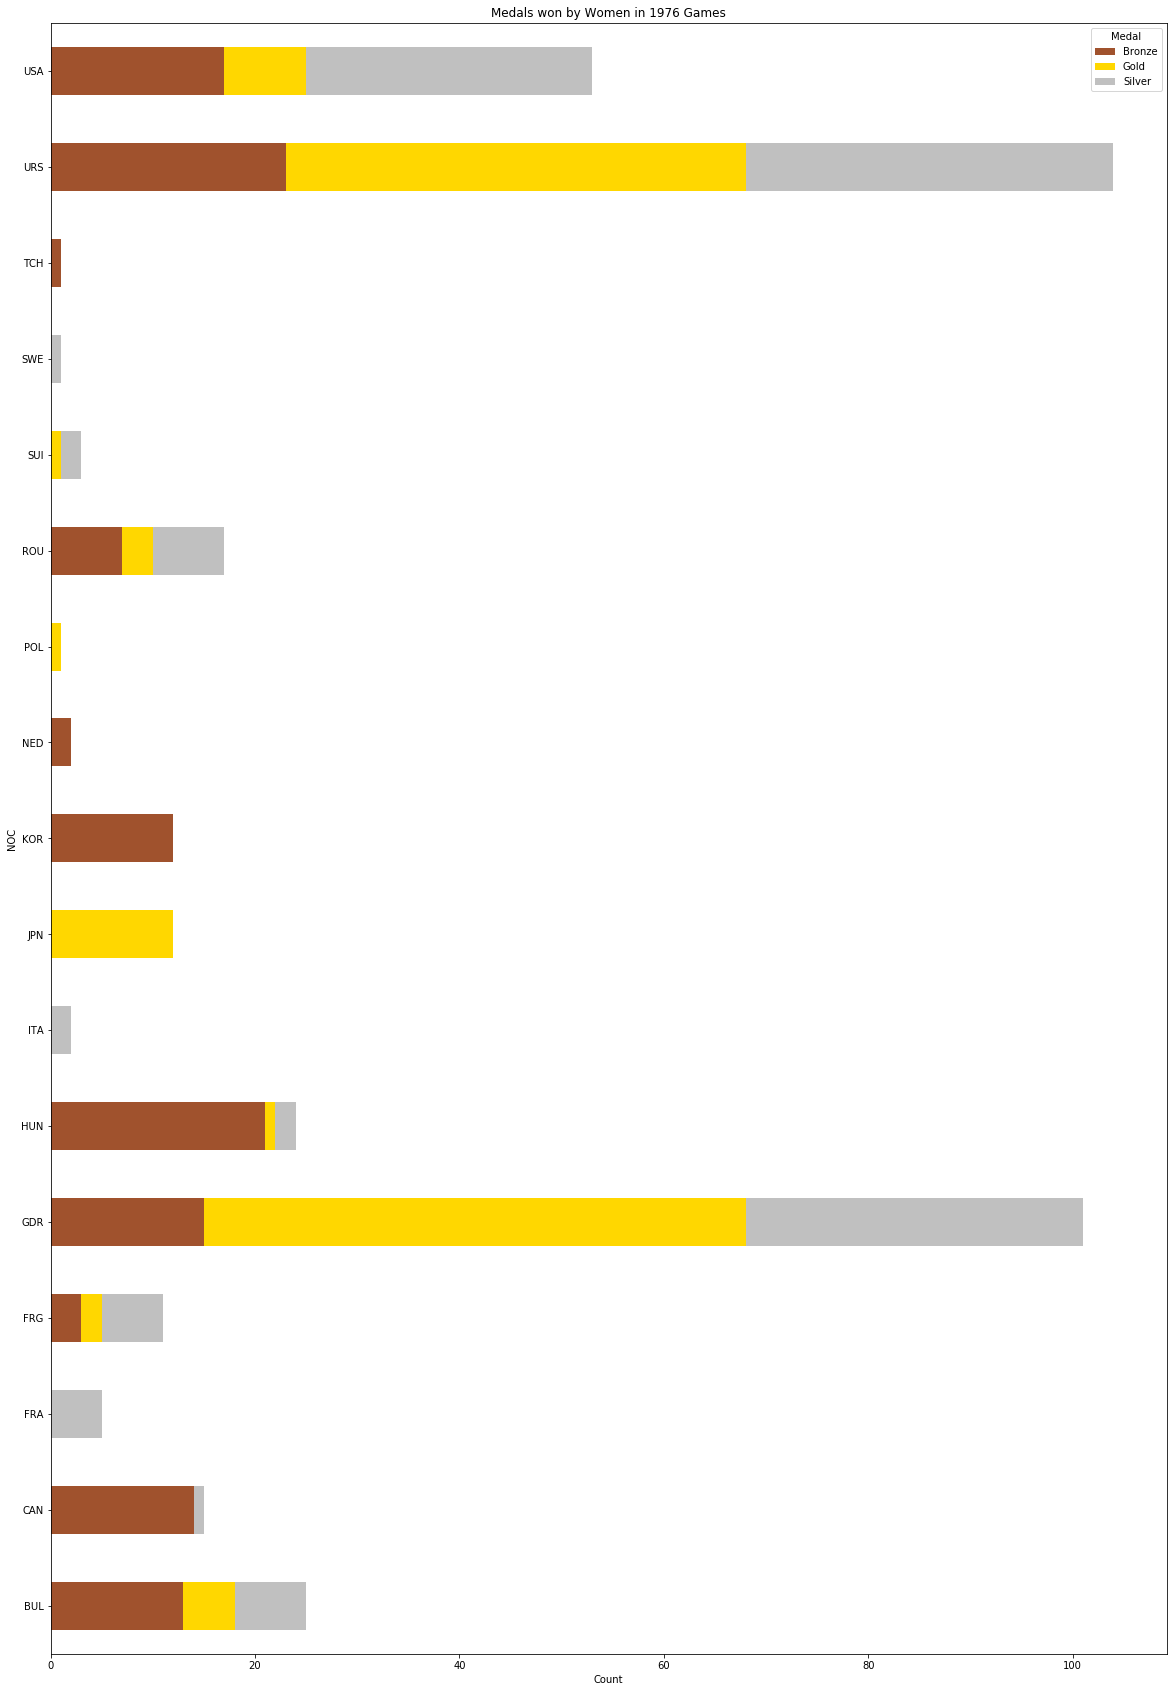

In [40]:
women_1976_medal_plot = women_1976_medal_count.groupby(['Medal', 
'NOC']).size().reset_index().pivot(columns='Medal', index='NOC', values=0)

ax = women_1976_medal_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won by Women in 1976 Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")

## Medal counts for women of different nations: 2016

In [41]:
women_2016_medal_count = women_olympic[(women_olympic.Year == 2016) & 
                                       (women_olympic.Season == 'Summer')]

Text(0.5, 0, 'Count')

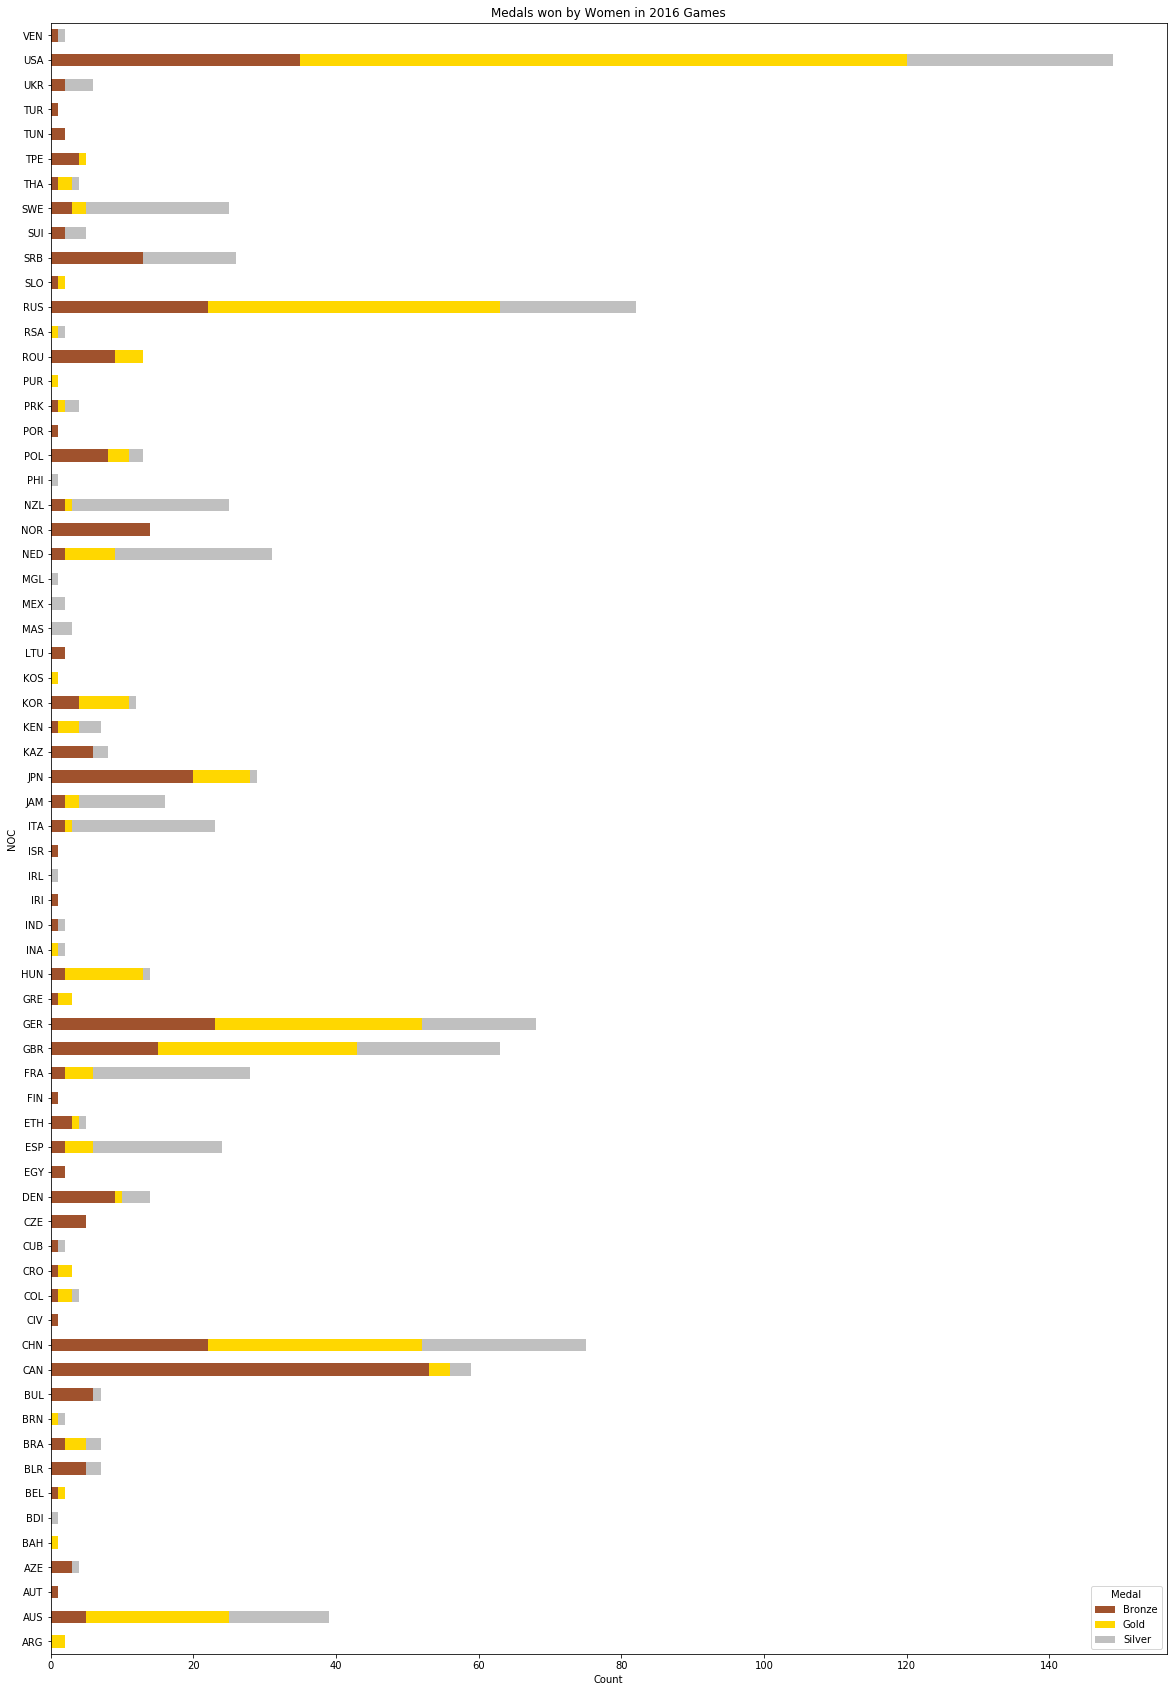

In [42]:
women_2016_medal_plot = women_2016_medal_count.groupby(['Medal', 
'NOC']).size().reset_index().pivot(columns='Medal', index='NOC', values=0)

ax = women_2016_medal_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won by Women in 2016 Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")

# The top 5 countries with max number of medals

In [43]:
gold_medals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


## Plotting the distribution of medals among the top 5

Text(0.5, 1, 'Medals per Country')

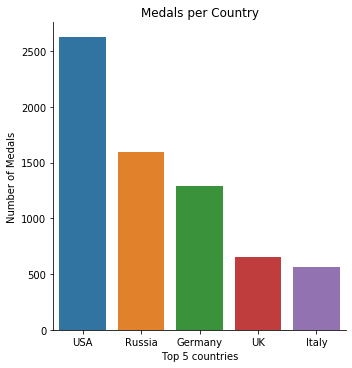

In [44]:
total_medal_country = gold_medals.region.value_counts().reset_index(name = 'Medal').head(5)
medal_plot = sns.catplot(x = 'index', y = 'Medal', data = total_medal_country, kind = 'bar')
medal_plot.set_xlabels("Top 5 countries")
medal_plot.set_ylabels("Number of Medals")
plt.title('Medals per Country')

## Determing the sports with their medal count for USA

In [45]:
gold_medal_USA = gold_medals.loc[gold_medals['NOC'] == 'USA']
gold_medal_USA.Event.value_counts().reset_index(name = 'Medal').head()

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95


# Height and weight of athletes

## Data completeness

In [46]:
MenOverTime = df[(df.Sex == 'M') & (df.Season == 'Summer')].fillna(0)
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,0.0,0.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,0,Finland,0


In [47]:
WomenOverTime = df[(df.Sex == 'F') & (df.Season == 'Summer')].fillna(0)
WomenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0,Netherlands,0
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,0,Netherlands,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,0,Finland,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,0,Finland,0
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,0.0,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,0


## Athlete height over time

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

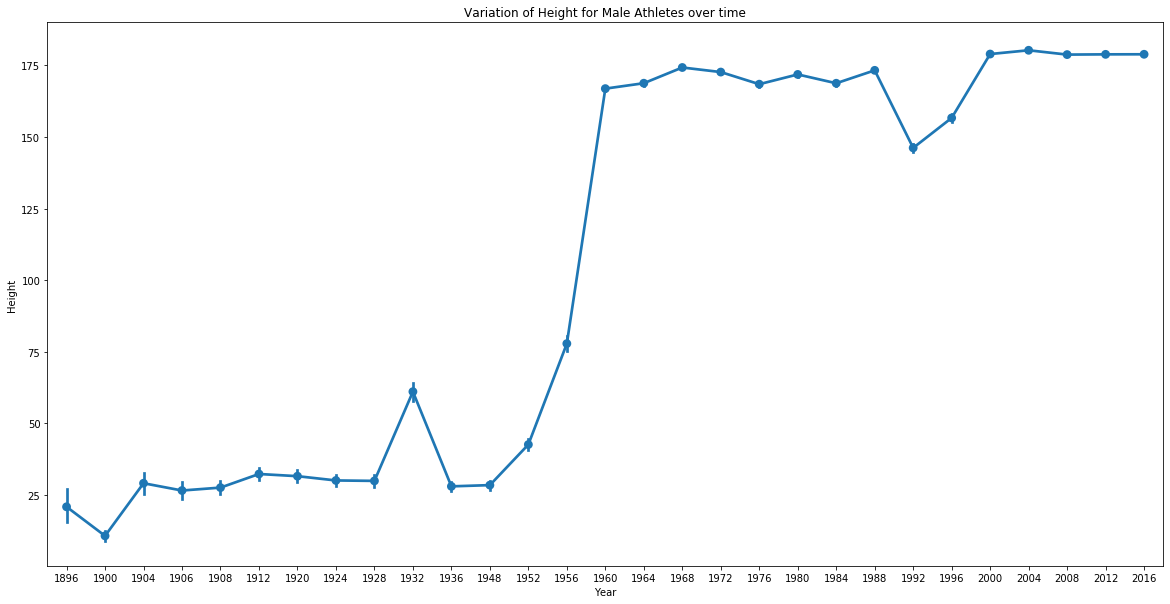

In [48]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=MenOverTime)
plt.title('Variation of Height for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

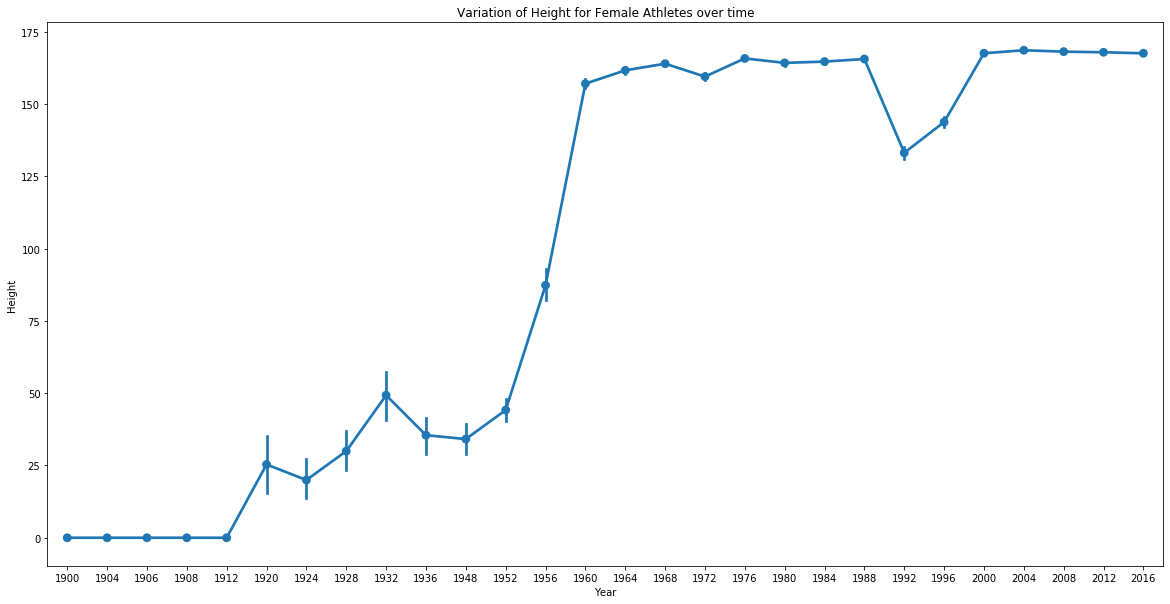

In [49]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=WomenOverTime)
plt.title('Variation of Height for Female Athletes over time')

## Athlete weight over time

Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

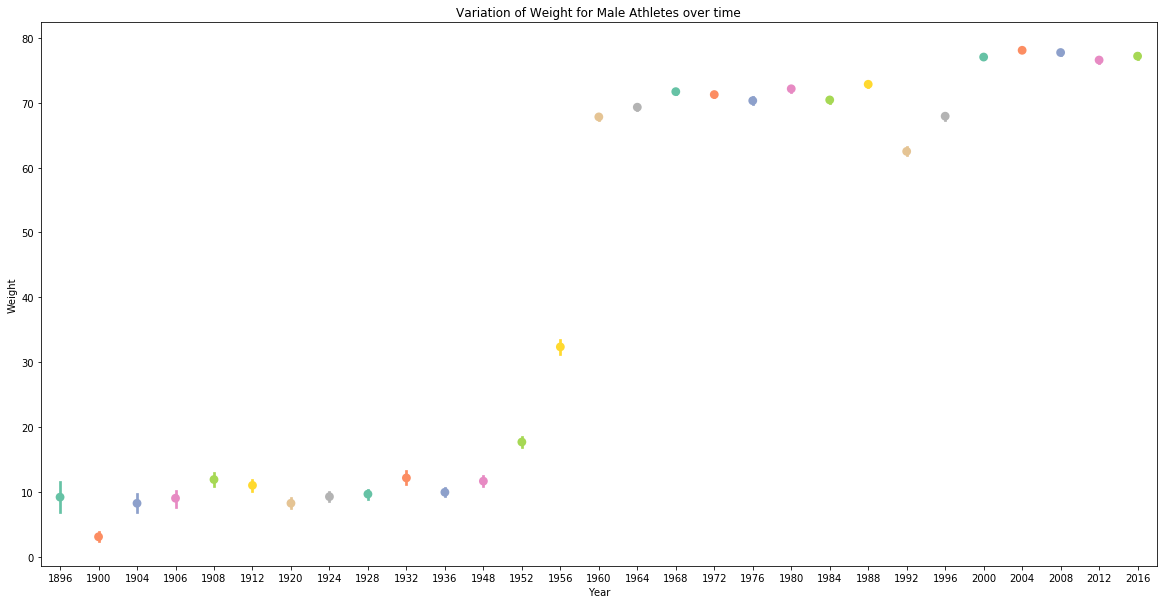

In [50]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenOverTime, palette='Set2')
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time')

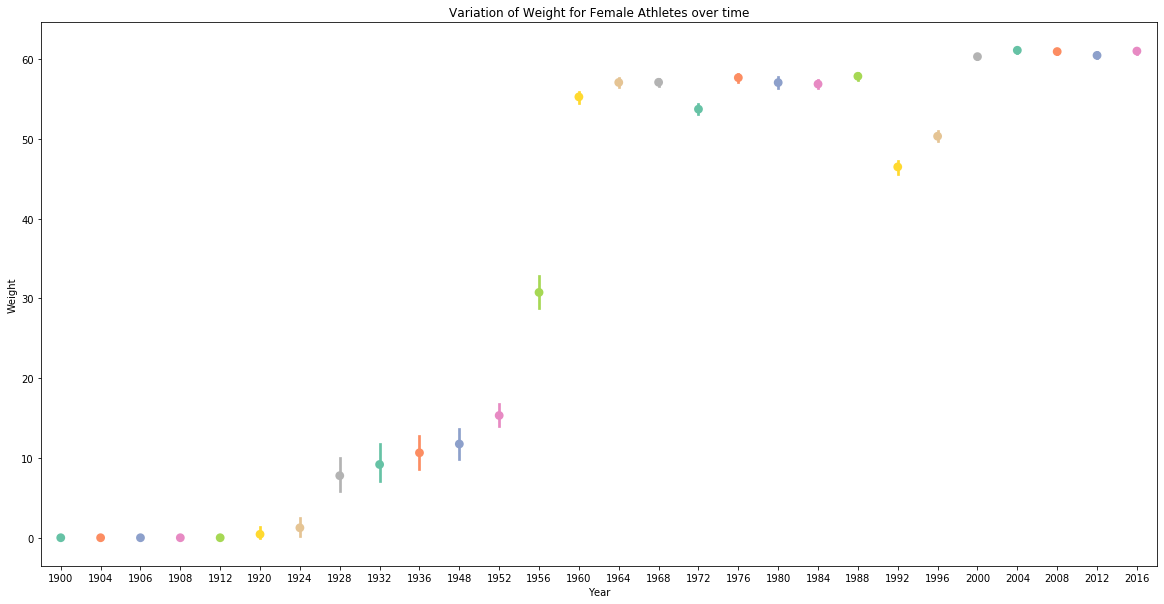

In [51]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=WomenOverTime, palette='Set2')
plt.title('Variation of Weight for Female Athletes over time')

##  Change in height vs change in weight over time across men’s sports

Text(0.5, 1.0, 'Variation of Height vs Weight for Male Athletes over time')

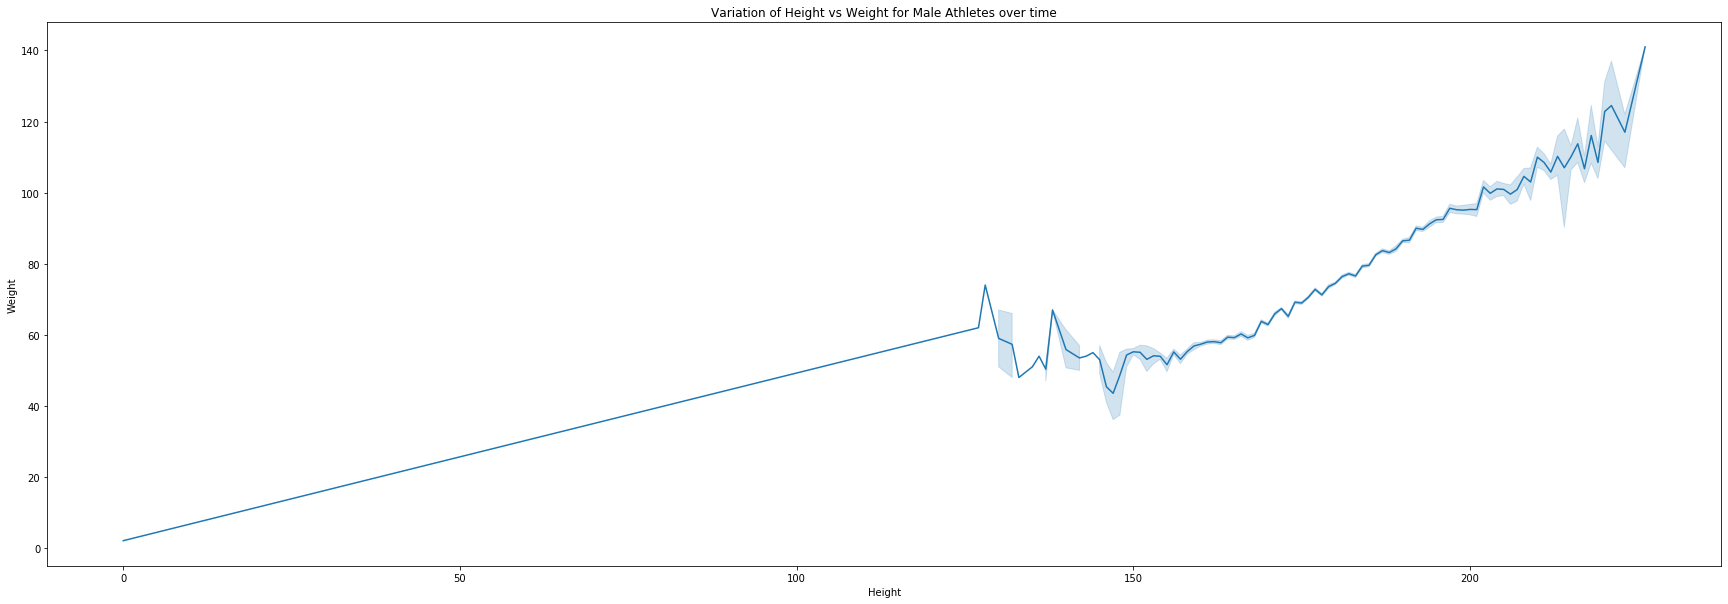

In [52]:
plt.figure(figsize=(30, 10))
sns.lineplot('Height','Weight', data=MenOverTime, palette='Set2')
plt.title('Variation of Height vs Weight for Male Athletes over time')

##  Change in height vs change in weight over time across women’s sports

Text(0.5, 1.0, 'Variation of Height vs Weight for Female Athletes over time')

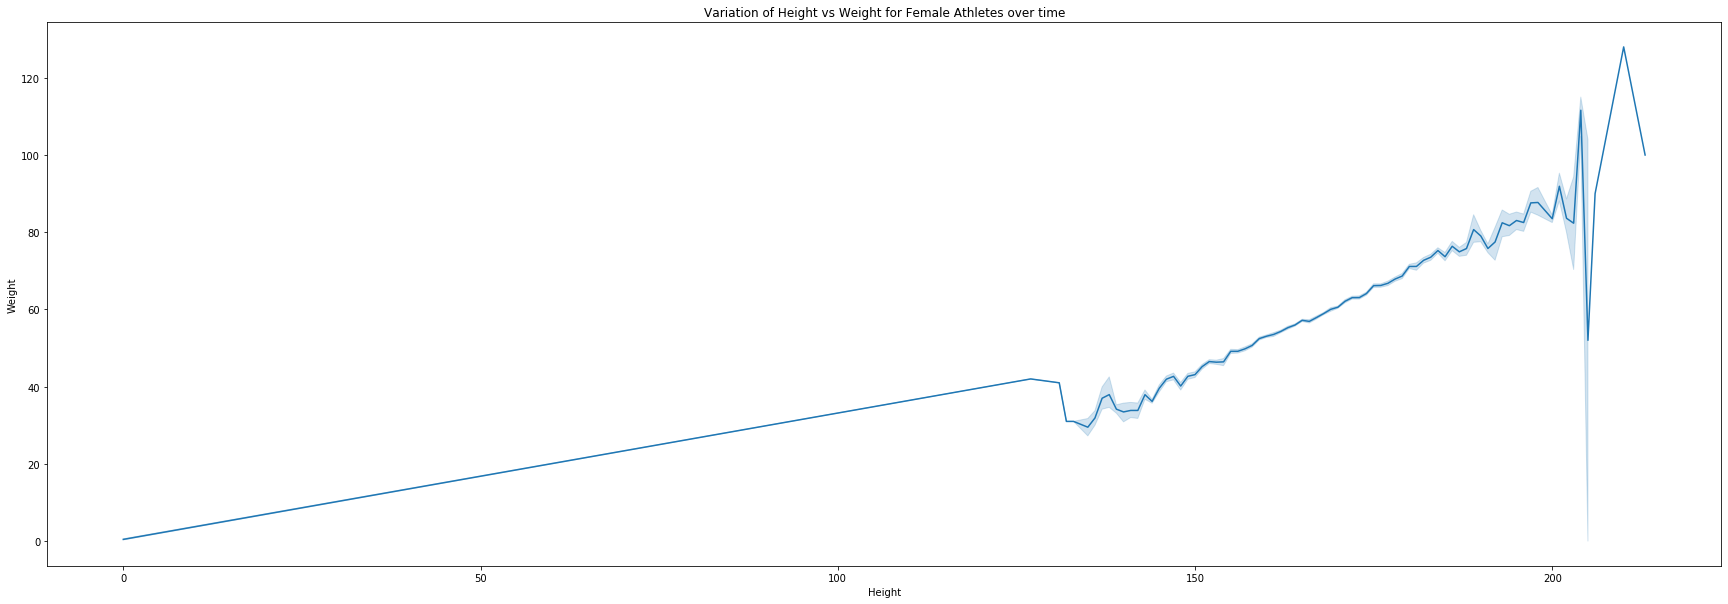

In [53]:
plt.figure(figsize=(30, 10))
sns.lineplot('Height','Weight', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height vs Weight for Female Athletes over time')

## Athlete age over time

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

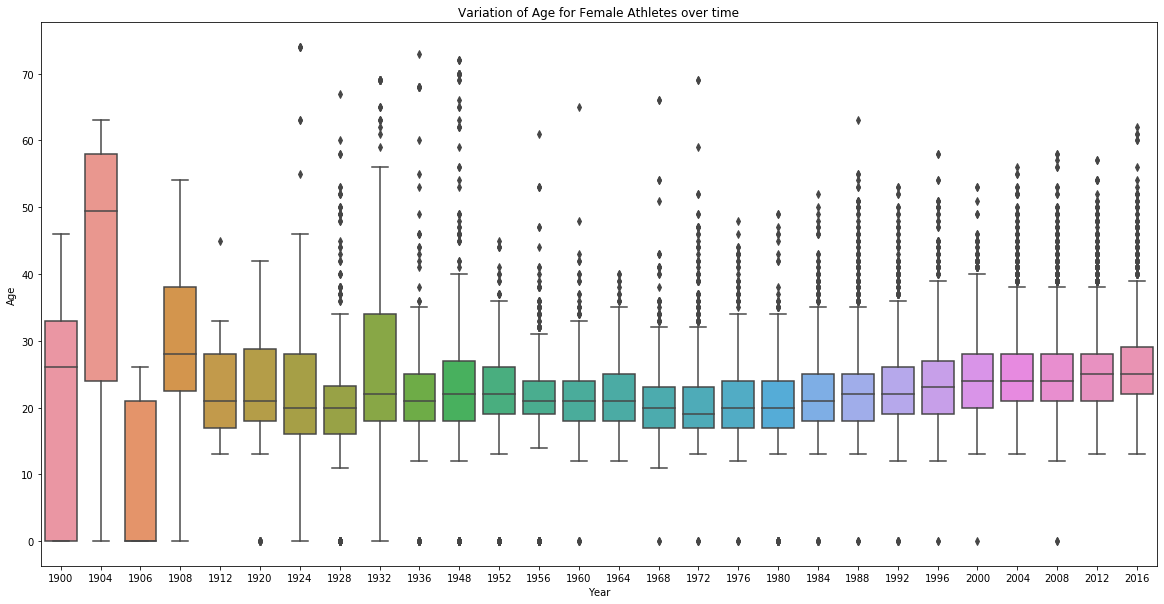

In [54]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

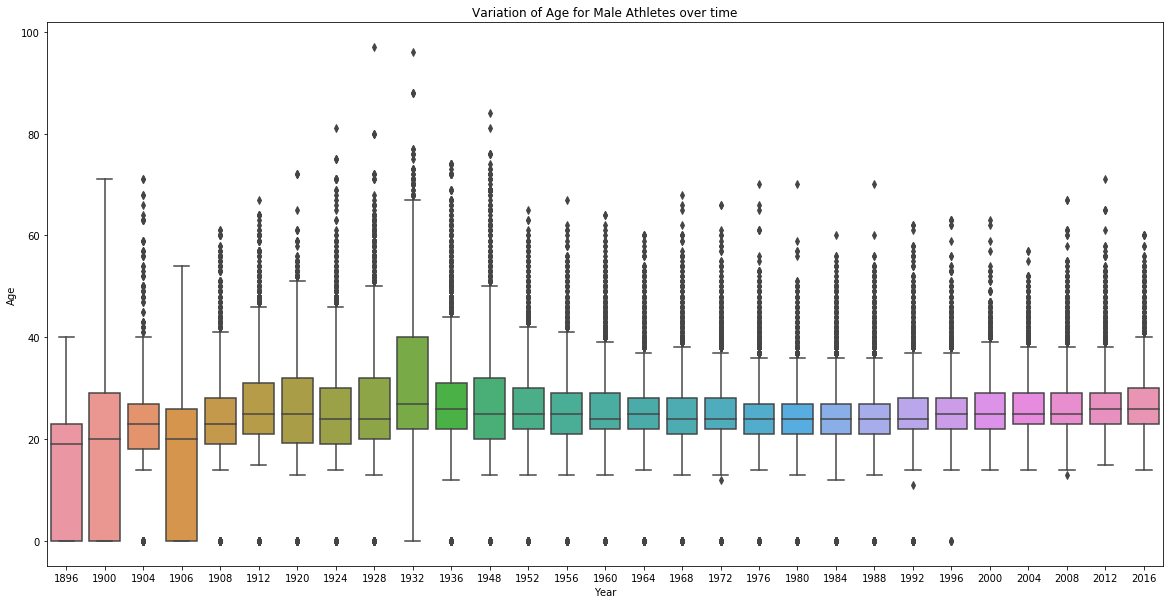

In [55]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

## Variation of male/female athletes over time

Text(0.5, 1.0, 'Variation of Male Athletes over time')

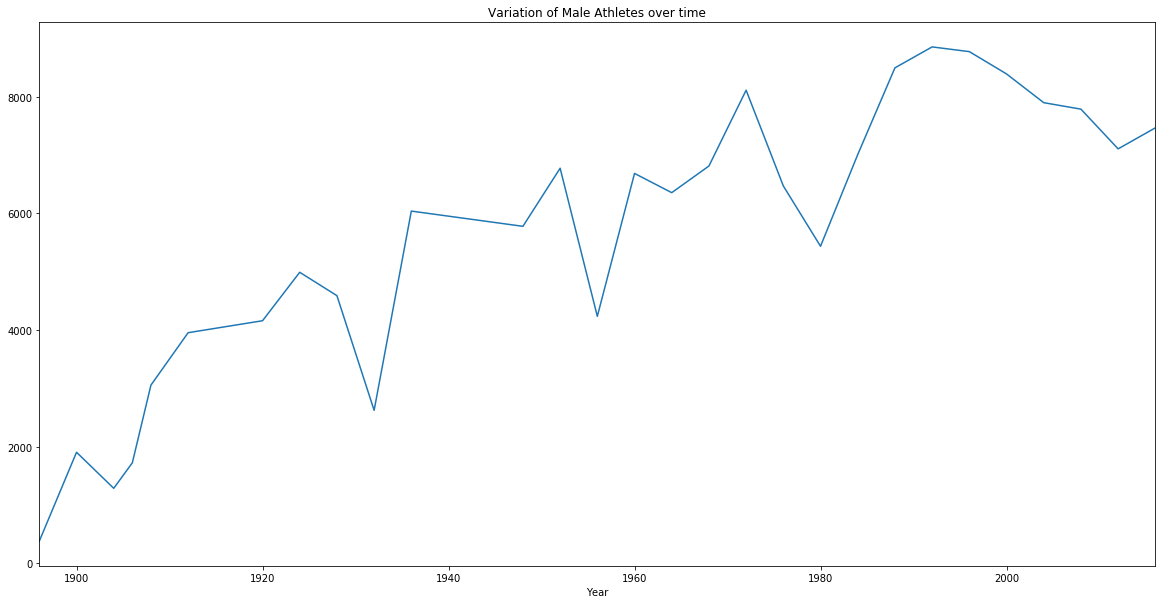

In [56]:
part_male = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part_male.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

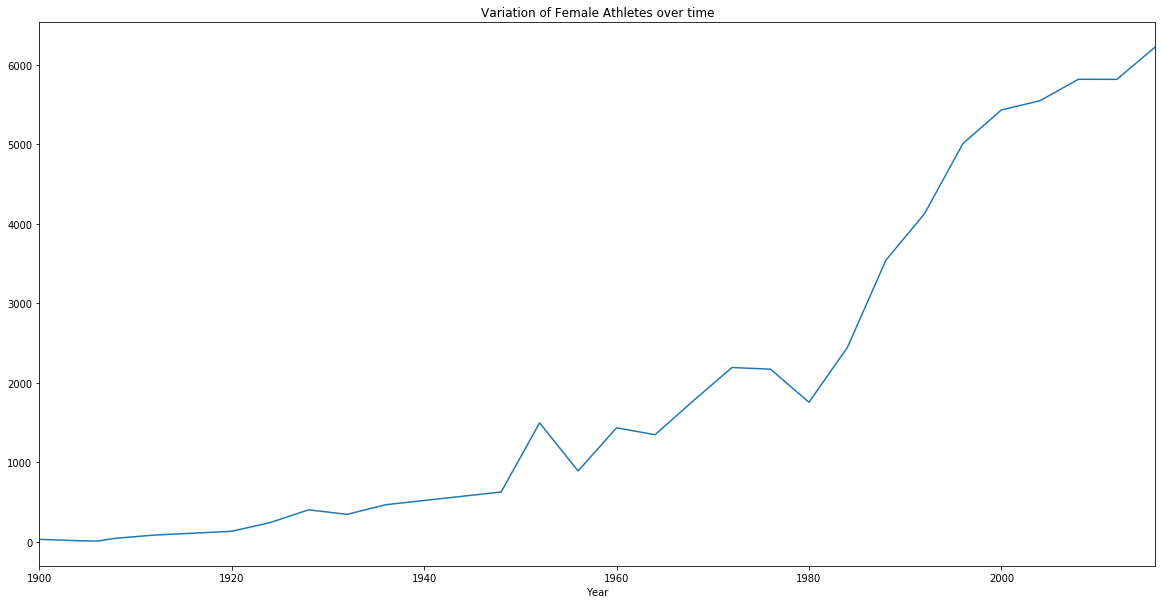

In [57]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

# More athletes, nations, and events

## Has the number of athletes changed over time?

In [58]:
winter = df[df["Season"] == "Winter"]
winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


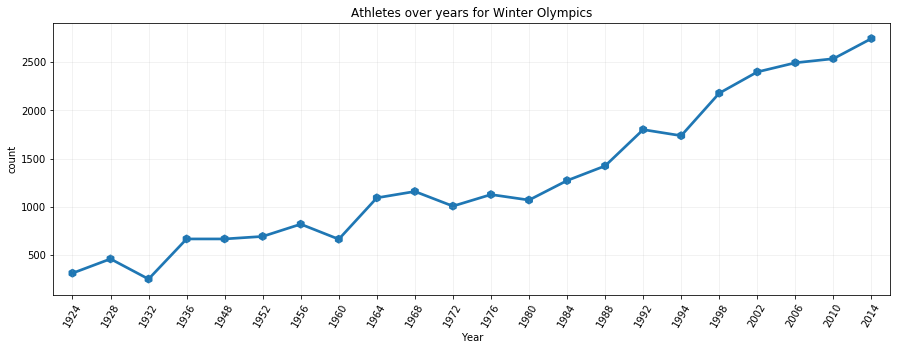

In [59]:
win_athelets = winter.groupby(["Year"])["ID"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = win_athelets["Year"] , y = win_athelets["ID"],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Athletes over years for Winter Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

In [60]:
summer = df[df["Season"] == "Summer"]
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Athletes over years for Summer Olympics')

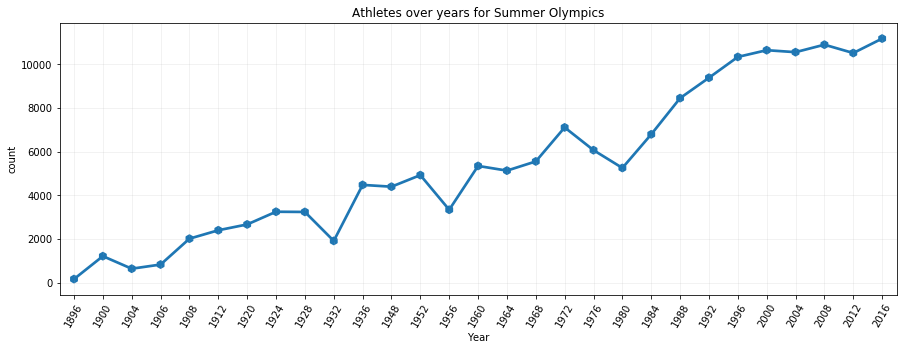

In [61]:
sum_athletes = summer.groupby(["Year"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(15,5))

ax = sns.pointplot(x = sum_athletes["Year"] , y = sum_athletes["ID"],markers="h")

plt.xticks(rotation = 60)

plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Athletes over years for Summer Olympics")

## Number of men and women over time

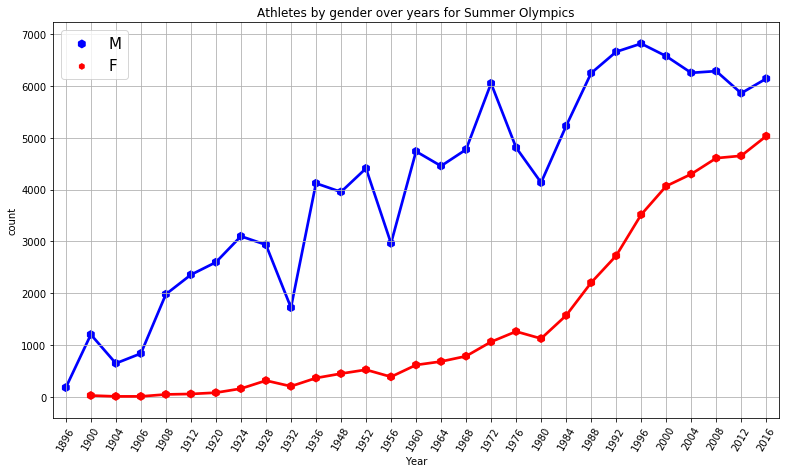

In [62]:
sum_gc = summer.groupby(["Year","Sex"])["ID"].nunique().reset_index()


fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = sum_gc["Year"] , y = sum_gc["ID"],
                   markers="h" , hue = sum_gc["Sex"],palette = ["b","red"])
plt.grid(True)
plt.xticks(rotation = 60)
plt.ylabel("count")
plt.title("Athletes by gender over years for Summer Olympics")
plt.legend(loc = "best" ,prop={"size":15})

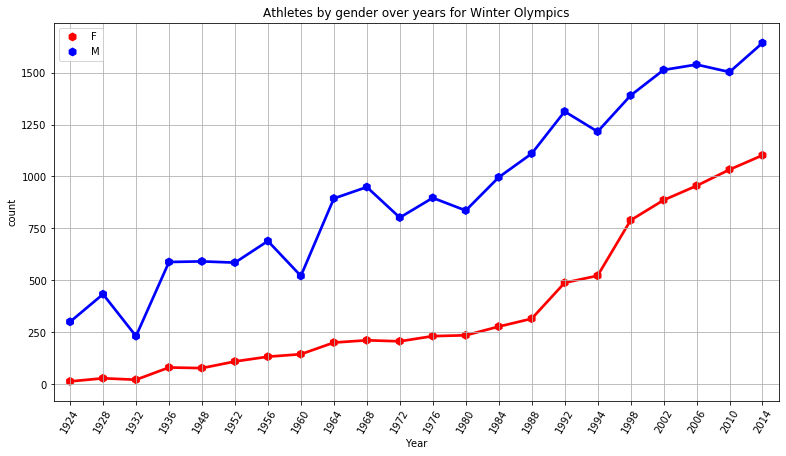

In [63]:
win_gc = winter.groupby(["Year","Sex"])["ID"].nunique().reset_index()
fig = plt.figure(figsize=(13,16))

plt.subplot(212)
ax1 = sns.pointplot(x = win_gc["Year"] , y = win_gc["ID"],
                    markers="h",palette = ["red","blue"],
                   hue = win_gc["Sex"])
plt.xticks(rotation = 60)
plt.grid(True)
plt.ylabel("count")
plt.title("Athletes by gender over years for Winter Olympics")
plt.legend(loc = "best")
plt.subplots_adjust(hspace = .3)
plt.show()


## Has the number of Events changed over time?

Text(0.5, 1.0, 'Events over years for Summer Olympics')

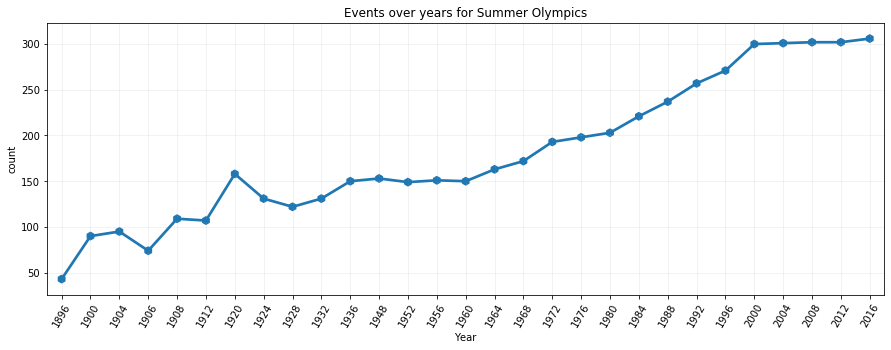

In [64]:
sum_event = summer.groupby(["Year"])["Event"].nunique().reset_index()

fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x = sum_event["Year"] , y = sum_event["Event"],markers="h")

plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Events over years for Summer Olympics")

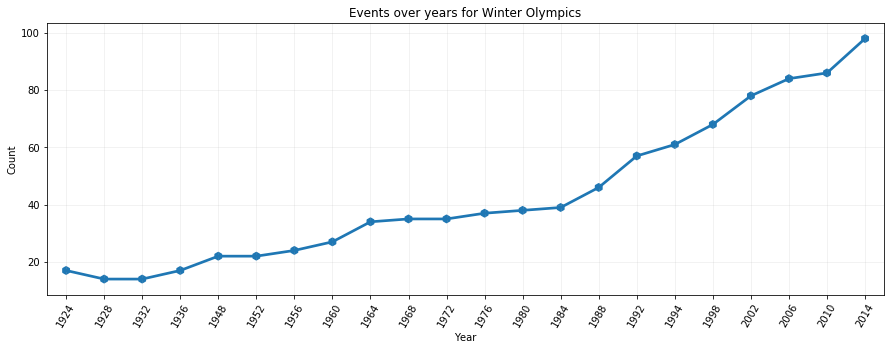

In [65]:
win_event = winter.groupby(["Year"])["Event"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = win_event["Year"] , y = win_event["Event"],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("Count")
plt.title("Events over years for Winter Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

## Has the number of countries changed over time?

Text(0.5, 1.0, 'Countries participated over years for Summer Olympics')

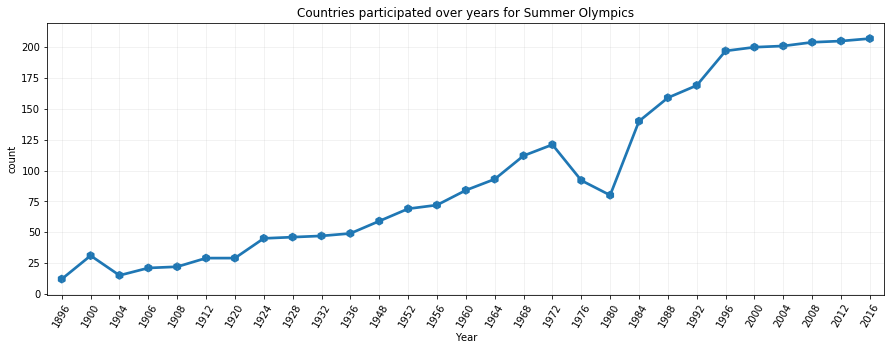

In [66]:
sum_nation = summer.groupby(["Year"])["NOC"].nunique().reset_index()

fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x = sum_nation["Year"] , y = sum_nation["NOC"],markers="h")

plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Countries participated over years for Summer Olympics")

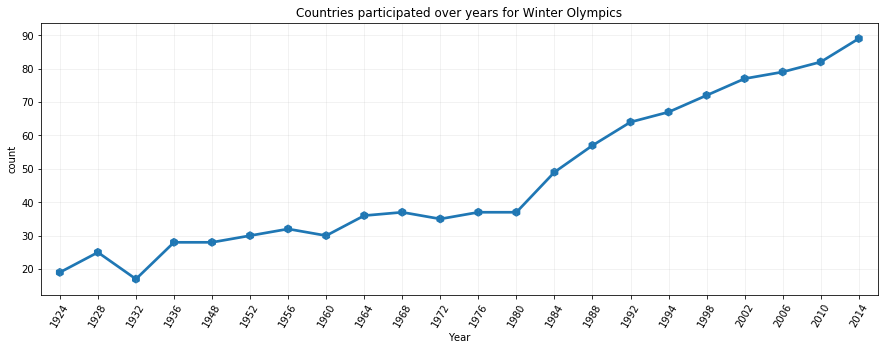

In [67]:
win_nation = winter.groupby(["Year"])["NOC"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = win_nation["Year"] , y = win_nation["NOC"],markers="h")
plt.xticks(rotation = 60)

plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Countries participated over years for Winter Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

# The Art Competitions

In [68]:
art_medal_count = df[(df.Sport == 'Art Competitions')] 
art_medal_count.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Finland,NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
1203,677,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN,France,NaN
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN


## Numer of  artists over time

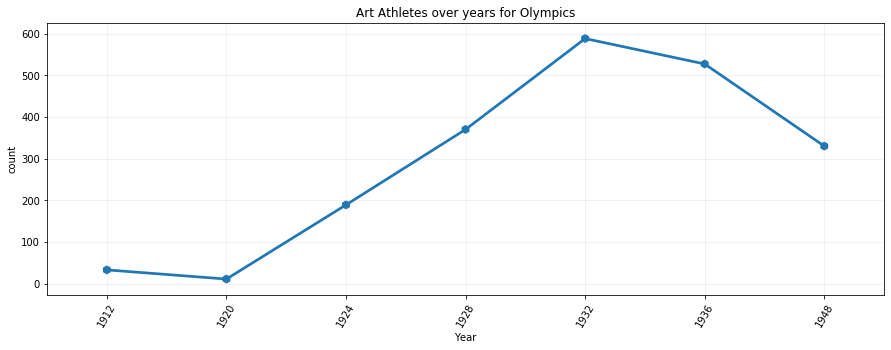

In [69]:
art_athelets = art_medal_count.groupby(["Year"])["ID"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = art_athelets["Year"] , y = art_athelets["ID"],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Art Athletes over years for Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

## Numer of art event over time

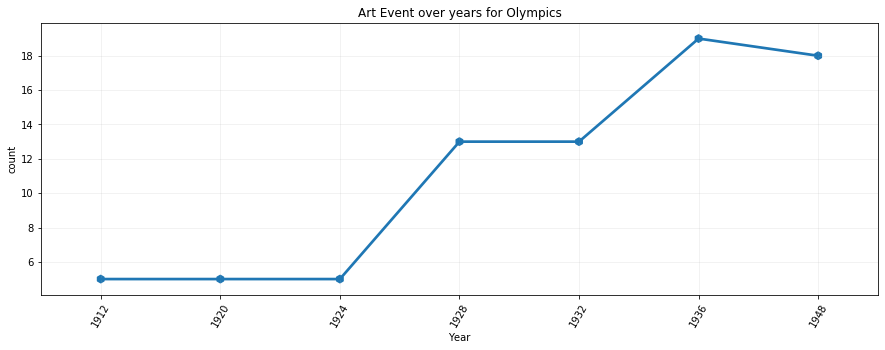

In [70]:
art_event = art_medal_count.groupby(["Year"])["Event"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = art_event["Year"] , y = art_event["Event"],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Art Event over years for Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

## Numer of nations participating in art over time


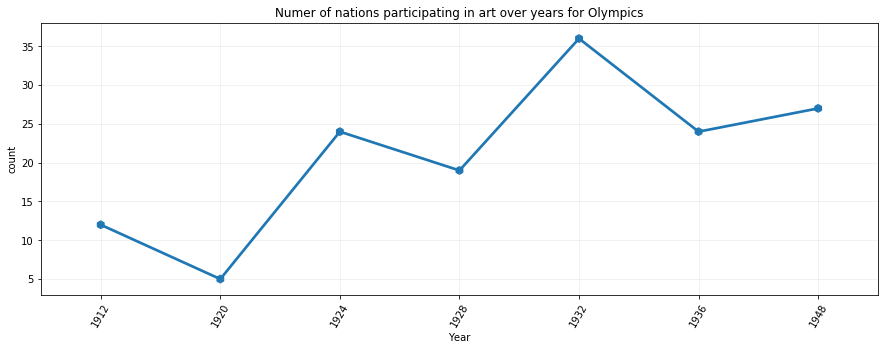

In [71]:
art_nation = art_medal_count.groupby(["Year"])["NOC"].nunique().reset_index()


fig = plt.figure(figsize=(15,5))

ax1 = sns.pointplot(x = art_nation["Year"] , y = art_nation["NOC"],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Numer of nations participating in art over years for Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

## Which countries won the most art medals?

Text(0.5, 0, 'Count')

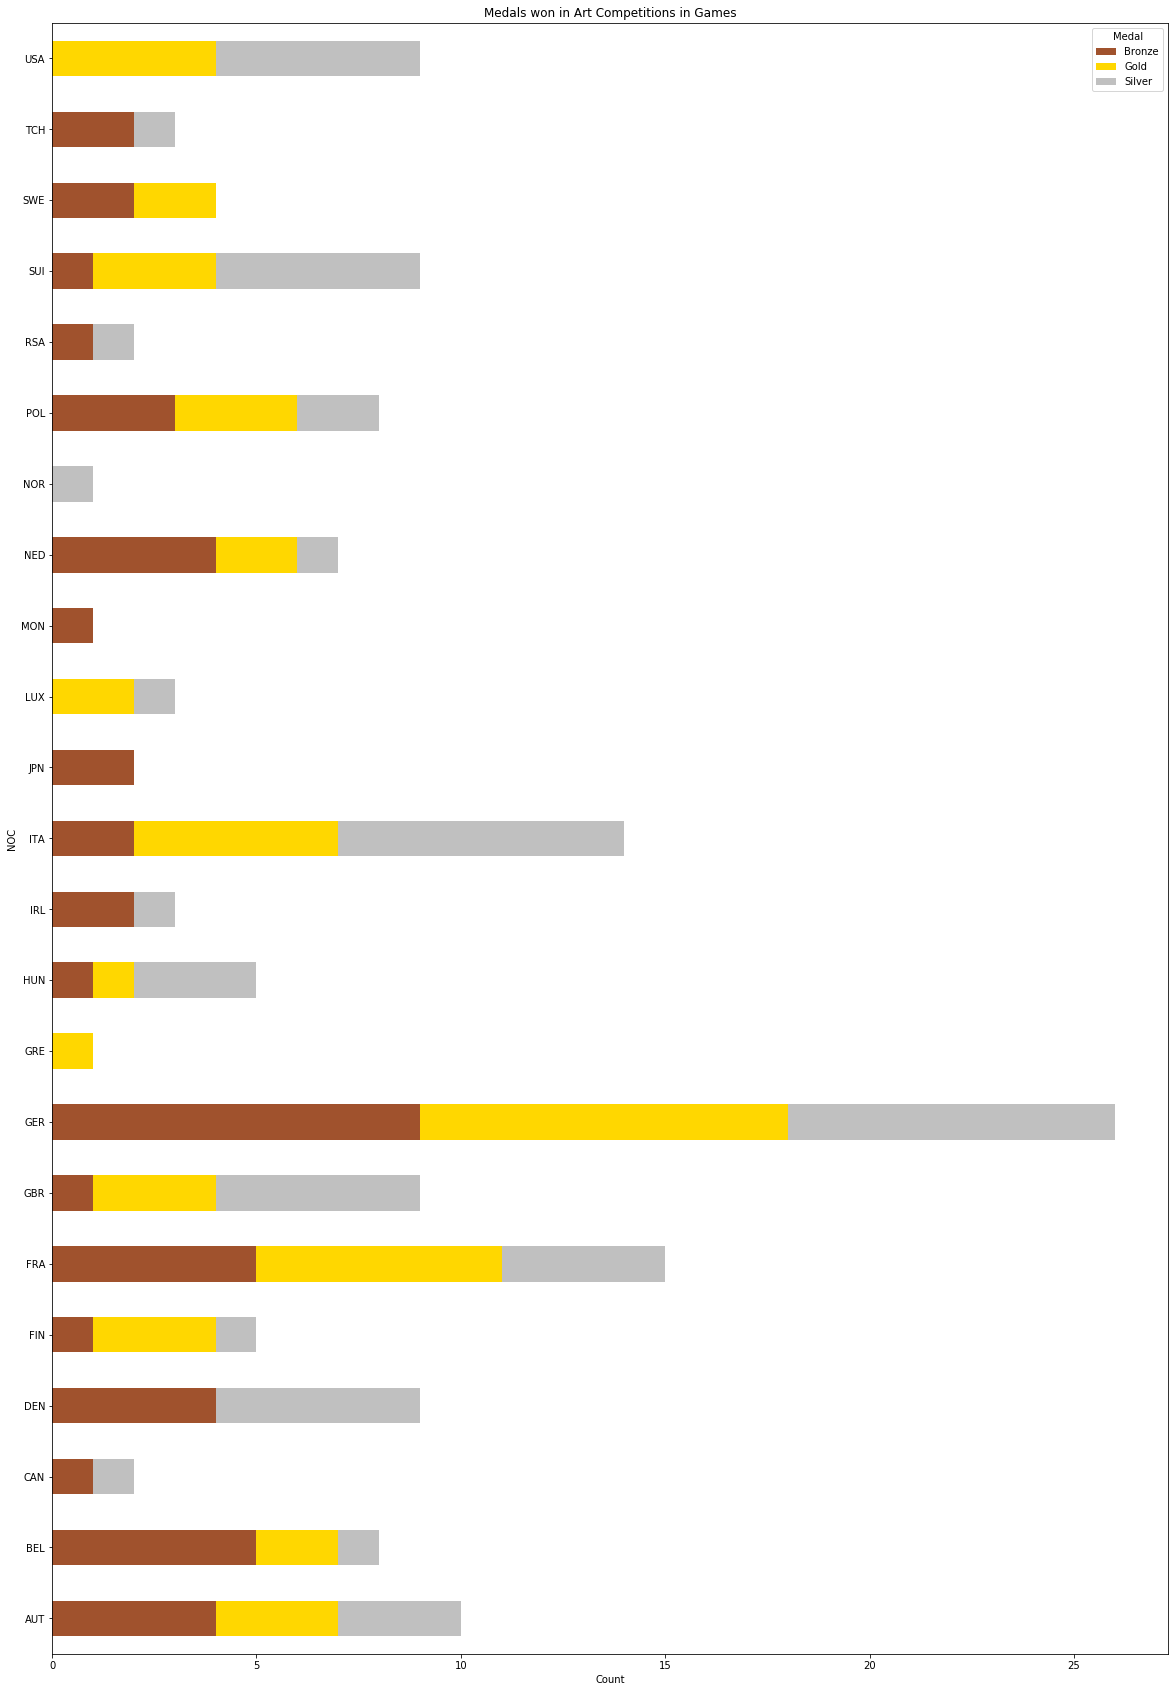

In [72]:
art_medal_plot = art_medal_count.groupby(['Medal', 
'NOC']).size().reset_index().pivot(columns='Medal', index='NOC', values=0)

ax = art_medal_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won in Art Competitions in Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")

## Nazis crush the 1936 Art Competitions

In [73]:
art_medal_1936_count = df[(df.Sport == 'Art Competitions') & (df.Year == 1936)] 
art_medal_1936_count.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4866,2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN,Germany,NaN
4867,2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN,Germany,NaN
5304,3002,"Kasper Angarius ""Ansgar"" Almquist",M,47.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Sweden,NaN
6009,3375,Sndor Ambrzy,M,32.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Hungary,NaN
7496,4188,Ferdinand Andri,M,65.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN,Austria,NaN


Text(0.5, 0, 'Count')

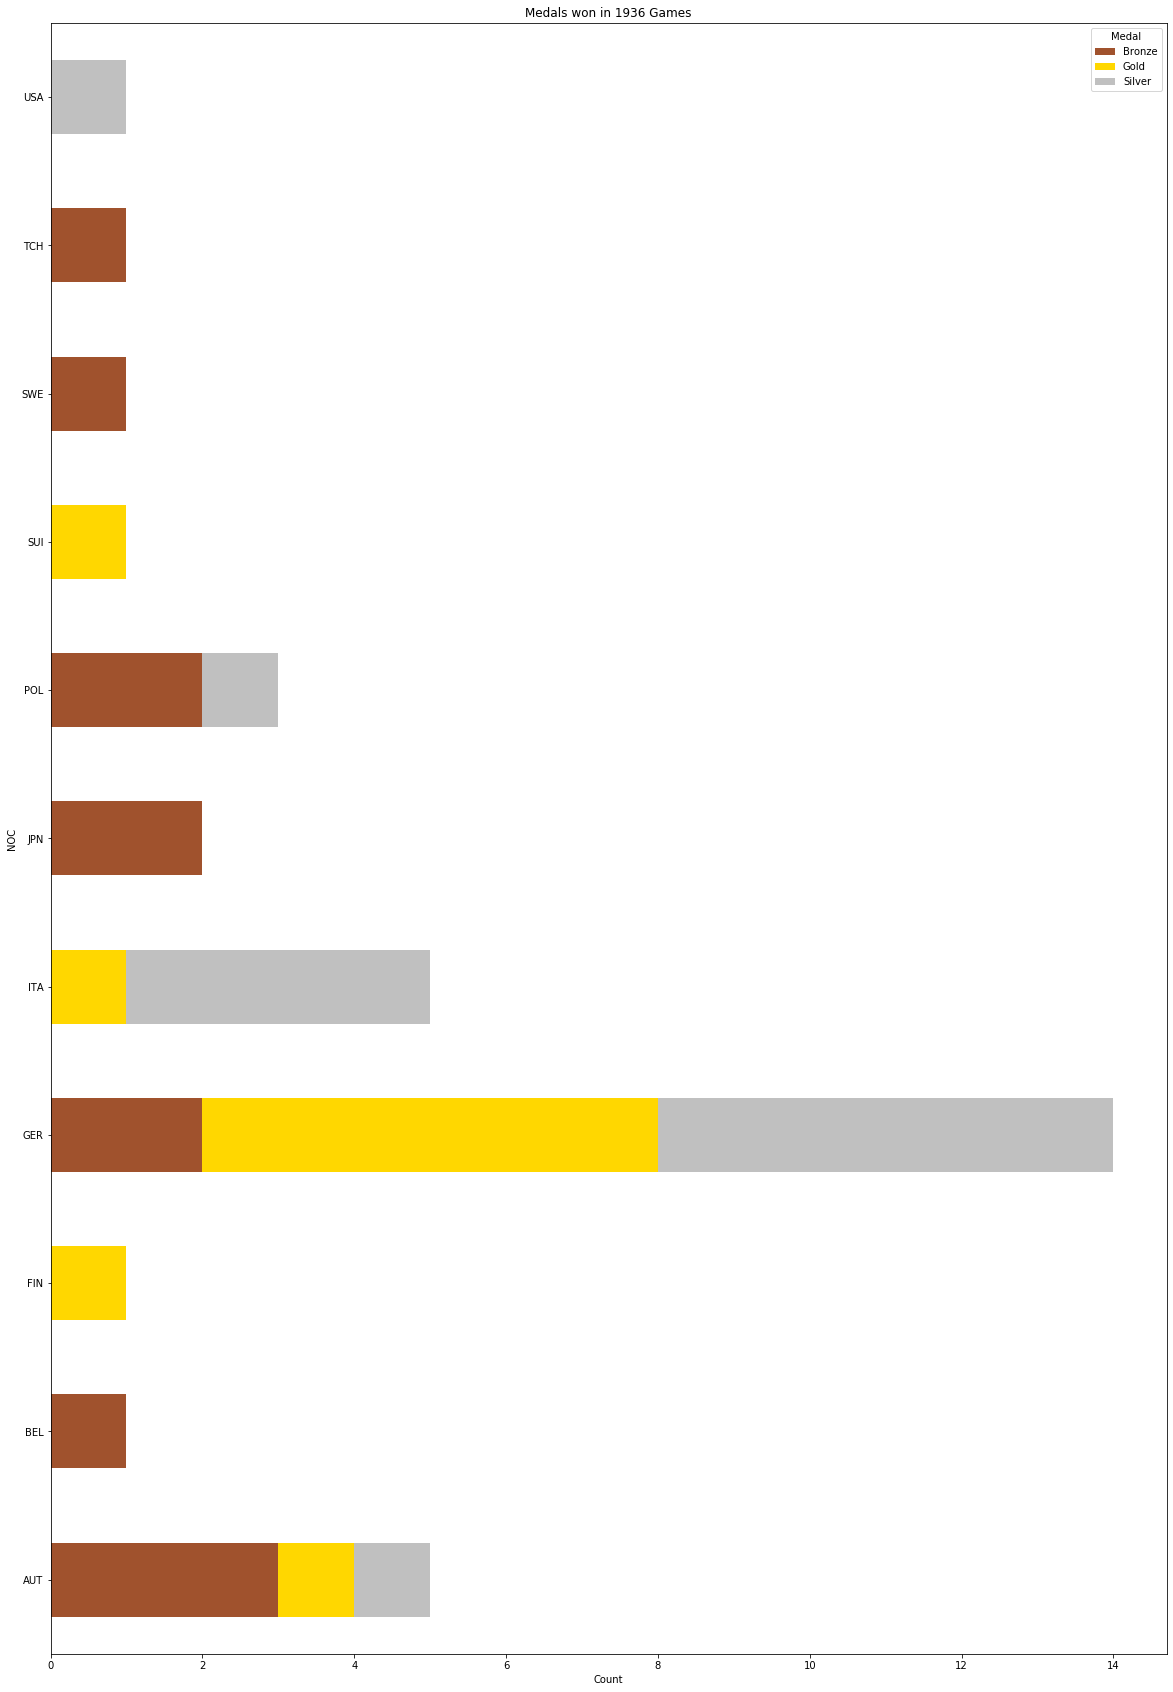

In [74]:
art_medal_1936_plot = art_medal_1936_count.groupby(['Medal', 
'NOC']).size().reset_index().pivot(columns='Medal', index='NOC', values=0)

ax = art_medal_1936_plot.sort_index().plot(kind='barh', stacked=True, figsize=(20,30), title = 
 'Medals won in 1936 Games', color=['sienna', 'gold', 'silver'])

ax.set_xlabel("Count")